significant trials, significant GT \n
plot trials based on significance or sleep state

In [1]:
import os
import numpy as np
import mne
import imageio
import h5py
# import scipy.fftpack
import matplotlib
import pywt
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# from scipy import signal
from matplotlib.colors import ListedColormap
import time
import seaborn as sns

# import scipy.io as sio
# from scipy.integrate import simps
import pandas as pd
# from scipy import fft
import matplotlib.mlab as mlab
import sys
import matplotlib as mpl
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\py_functions')
import NMF_funcs as NMFf
import significant_connections as SCF
from scipy.stats import norm
import LL_funcs
from scipy.stats import norm
from tkinter import filedialog
from tkinter import *
import ntpath

root = Tk()
root.withdraw()
import math
import scipy
from scipy import signal
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import platform
from glob import glob
from scipy.io import savemat
import scipy.cluster.hierarchy as spc
from scipy.spatial import distance
from sklearn.cluster import KMeans
import h5py
import basic_func as bf
from scipy.integrate import simps
from numpy import trapz
#import IO_func as IOF
#import BM_func as BMf
import tqdm
from matplotlib.patches import Rectangle
from pathlib import Path
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab
import BM_plots as BMp
import freq_funcs as ff
import CCEP_plot
import supp_CCEP_figures as CCEP_supp
import random
import math
from sklearn.metrics import cohen_kappa_score, jaccard_score, accuracy_score
dist_groups = np.array([[0, 30], [30, 60], [60, 120]])
dist_labels = ['local (<30 mm)', 'short (<60mm)', 'long']
Fs = 500
dur = np.zeros((1, 2), dtype=np.int32)
t0 = 1
dur[0, 0] = -t0
dur[0, 1] = 3

folder = 'BrainMapping'
# dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax = np.arange(dur[0, 0], dur[0, 1], (1 / Fs))
color_elab = np.zeros((3, 3))
color_elab[0, :] = np.array([31, 78, 121]) / 255
color_elab[1, :] = np.array([189, 215, 238]) / 255
color_elab[2, :] = np.array([0.256, 0.574, 0.431])
cwd = os.getcwd()
color_sleep = ['#808080', '#145da0', '#ff1919']
label_sleep = ['Wake', 'NREM', 'REM']
color_dist = ['0000FF','#0076C4','#00DD91']
import CCEP_func

In [2]:
cond_folder = 'CR'
path_gen_base = sub_path + '\Patients'

In [3]:
plt.rcParams.update({
            'font.family': 'arial',
            'font.size': 12,
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            'legend.fontsize': 9,
            'svg.fonttype': 'none',
            'font.size': 10,
            'axes.titlesize': 10,
            'axes.labelsize': 8,
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            'legend.fontsize': 9,
            'figure.titlesize': 10
        })

## Sig. Con. Example single patient

In [4]:
subj = "EL011"
path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)

path_gen = os.path.join(sub_path+'\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'  # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
path_infos = os.path.join(path_gen, 'Electrodes')
# labels
files_list = glob(path_patient_analysis + '\\' + folder + '/data/Stim_list_*')
i = 0
stimlist_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\stimlist_' + cond_folder + '.csv'
stimlist = pd.read_csv(stimlist_file)
lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
if "type" in lbls.columns:
    lbls = lbls[lbls.type=='SEEG']
    lbls = lbls.reset_index(drop=True)
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)
stimlist_sleep = pd.read_csv(os.path.join(path_patient_analysis, 'stimlist_hypnogram.csv'))
file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
con_trial = pd.read_csv(file_con)
badchans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(badchans.values[:, 1:] == 1))[0, :])

In [5]:
h5_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\EEG_' + cond_folder + '.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    EEG_resp = h5py.File(h5_file)
    EEG_resp = EEG_resp['EEG_resp']

loading h5


In [6]:
h5_file = path_patient_analysis + '\\' + folder + '\\data\\M_CC_similarity.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    CC = h5py.File(h5_file)
    CC = CC['M_GT_all']

loading h5


In [7]:
h5_file = path_patient_analysis + '\\' + folder + '\\data\\LL_CC_surr_similarity.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    CC_surr = h5py.File(h5_file)
    CC_WOI = CC_surr['CC_WOI']
    CC_surr = CC_surr['CC_LL_surr']
    
h5_file = path_patient_analysis + '\\' + folder + '\\data\\M_CC_similarity.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    CC = h5py.File(h5_file)
    CC = CC['M_GT_all']

loading h5
loading h5


In [8]:
file_CC_summ = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\summ_general.csv'  # summary_genera
con_summary_all = pd.read_csv(file_CC_summ)
con_summary_all = con_summary_all.drop_duplicates()

In [10]:
import supp_sleep_CCEP_figures as fig_sleep

In [13]:
con_trial

,Chan,Stim,Artefact,Num_block,Date,LL_pre,P2P_1s,AUC,N2,N1,...,Ictal,Sleep,Block,LL,Hour,Num,P2P,P2P_BL,d,Time
0,0,38,0.0,0,20220215.0,1.733186,317.084005,1868.943085,186.532776,46.754261,...,0,0.0,1.0,3.112841,15.0,0,265.986196,320.050580,35.68,2022-02-15 15:46:15
1,1,38,0.0,0,20220215.0,1.535151,285.398920,733.133562,78.930676,-12.537068,...,0,0.0,1.0,3.031068,15.0,0,225.747675,384.064240,37.37,2022-02-15 15:46:15
2,2,38,0.0,0,20220215.0,1.674153,413.503845,458.239966,89.895729,-83.864569,...,0,0.0,1.0,4.379837,15.0,0,291.642580,420.468026,39.31,2022-02-15 15:46:15
3,3,38,0.0,0,20220215.0,1.116324,324.343740,378.599663,134.375521,84.594039,...,0,0.0,1.0,2.827771,15.0,0,230.336831,497.933002,41.45,2022-02-15 15:46:15
4,4,38,0.0,0,20220215.0,0.963854,173.763853,342.073528,94.871705,79.759791,...,0,0.0,1.0,1.891443,15.0,0,172.429460,372.258166,43.77,2022-02-15 15:46:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556033,74,3,0.0,149,20220218.0,1.273549,202.835507,613.487704,82.154017,78.160317,...,0,0.0,69.0,1.970189,13.0,10343,104.522798,235.871487,44.99,2022-02-18 13:58:11
556034,75,3,0.0,149,20220218.0,2.071644,142.798577,318.740799,52.922989,13.505955,...,0,0.0,69.0,2.200763,13.0,10343,95.842847,219.150946,48.43,2022-02-18 13:58:11
556035,76,3,0.0,149,20220218.0,2.591216,236.660493,407.204067,88.886005,1.512458,...,0,0.0,69.0,1.932323,13.0,10343,149.248580,234.025151,51.88,2022-02-18 13:58:11
556036,85,3,0.0,149,20220218.0,3.949566,225.104824,735.800519,83.341010,60.386459,...,0,0.0,69.0,4.939126,13.0,10343,152.368387,251.848110,83.09,2022-02-18 13:58:11


AttributeError: 'DataFrame' object has no attribute 'SleepState'

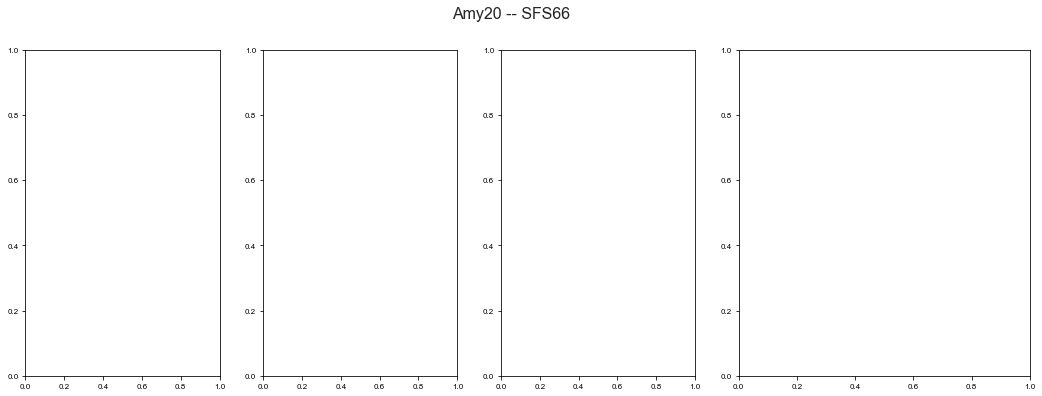

In [11]:
sc = 19
rc = 65
ax = fig_sleep.plot_SleepState(sc, rc, EEG_resp, con_trial, labels_all, metric = 'LL')